In [1]:
import torch
from torch import nn
from torch_kan import BatchedBSplines

In [2]:
B = 8
inDim = 32
outDim = 64
nEval = 1600
nCps = 6
k = 2
spl = BatchedBSplines(nCps, k)
x = torch.linspace(-1, 1, nEval).unsqueeze(0).unsqueeze(0).expand(B, inDim, -1)
cp = torch.randn(inDim, outDim, nCps)
import matplotlib.pyplot as plt

splines = spl(x, cp)


def plotSpline(splines, cps, b, inDim, i, j):
    from scipy.interpolate import BSpline

    plt.plot(
        x[b, inDim].detach(),
        splines[b, i, j].detach(),
        "r-",
        lw=4,
        alpha=0.5,
        label="de Boor",
    )
    plt.plot(
        x[b, inDim],
        BSpline(spl.t.detach(), cps[i, j].detach(), k)(
            x[b, inDim]
        ),  # We check that the generated B-splines are correct with scipy implementation
        "b-",
        lw=4,
        alpha=0.5,
        label="GT BSpline",
    )
    plt.scatter(spl.t[k:-k], cps[i, j, :-1].detach())
    plt.legend(loc="best")
    plt.show()

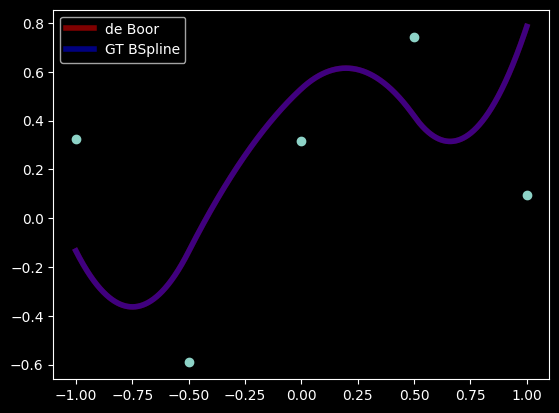

In [3]:
plotSpline(splines, cp, 0, 0, 0, 0)